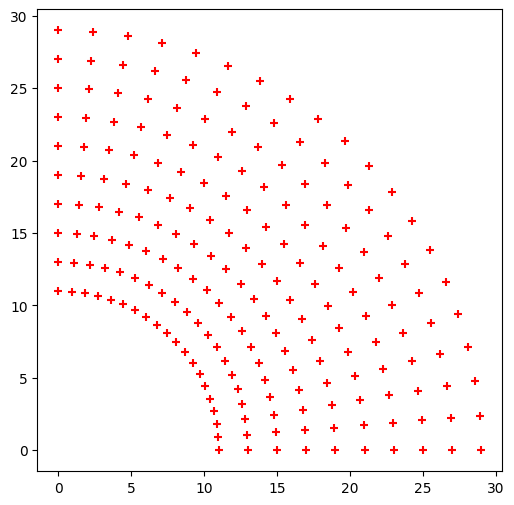

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_squared_error
# Preaper training data (input)
l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1)) #將L cos(T)弄成一豎一橫的向量
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1)) #矩陣乘法＠
plt.figure(figsize=(6,6))
plt.scatter(X.ravel(),Y.ravel(),marker='+',color='red') #拉直 才能畫出來
plt.show()


In [4]:
l1=l.reshape(-1,1)

In [5]:
t1=np.cos(t.reshape(1,-1)) 

# ANN 第一象限 機器人手臂位置

Root Mean square error is 0.0609


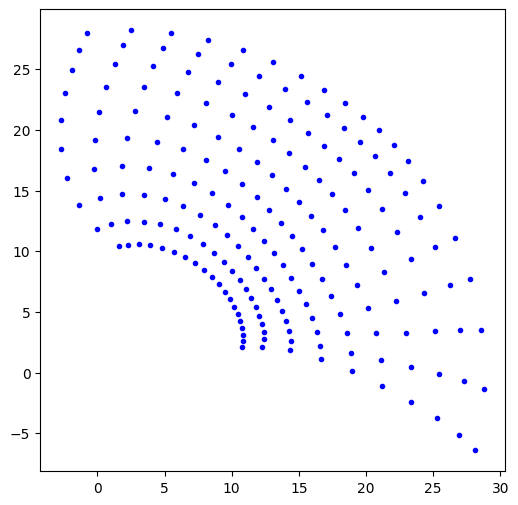

In [14]:
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) -  np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] #200*2 座標
OutputY = np.c_[theta1, theta2] #200*2 theta
hidden_layers = (10, )#隱藏層數量
solver = 'lbfgs' # the best for robot data 最常用的
# solver = ’sgd’ (針對類別)
# solver = ’adam’

# default activation = ’relu’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, 
verbose = False, activation = 'logistic',  tol=1e-6, random_state = 0) #max_iter最大次數
#activation激發函數
#verbose印出來

mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat) 
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.figure(figsize=(6,6))
plt.scatter(x_hat,y_hat,marker='.',color='blue')